In [18]:
#customer datas
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
df_customers = pd.read_csv(r"C:\Users\sgaut\OneDrive\Desktop\dataspark datasets\uncleaned\Customers.csv", encoding='latin1')
df_customers


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [19]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [20]:
#checking missing values
df_customers.isnull().sum()


CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [21]:
#drop useless columns
df_customers.drop(["State Code","Zip Code"],axis=1,inplace=True)

In [22]:
df_customers.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State', 'Country',
       'Continent', 'Birthday'],
      dtype='object')

In [23]:
df_customers.drop_duplicates(inplace=True)

In [32]:
#convert birthday column to datetime datatype
df_customers['Birthday']=pd.to_datetime(df_customers['Birthday'])
df_customers.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19


In [33]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State        15266 non-null  object        
 5   Country      15266 non-null  object        
 6   Continent    15266 non-null  object        
 7   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 954.3+ KB


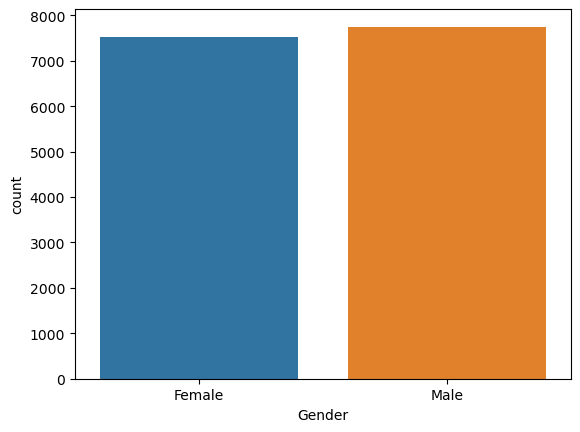

In [26]:
#visualization gender details(countplot)
sns.countplot(x=df_customers['Gender'],data=df_customers,hue='Gender')
plt.xlabel=("Gender")
plt.ylabel=("counts")
plt.title=("counts as per Gender")
plt.show()

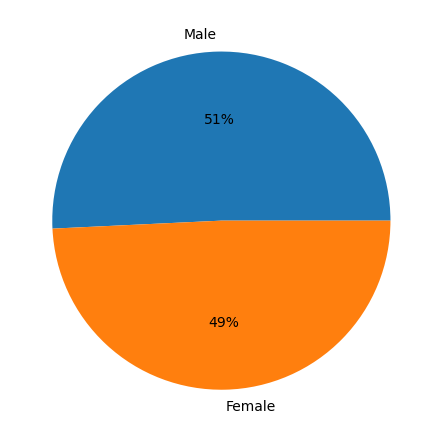

In [27]:
#visualization gender details(pie)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(df_customers["Gender"].value_counts(),autopct='%1.0f%%',labels=['Male','Female'])
plt.show()

TypeError: 'str' object is not callable

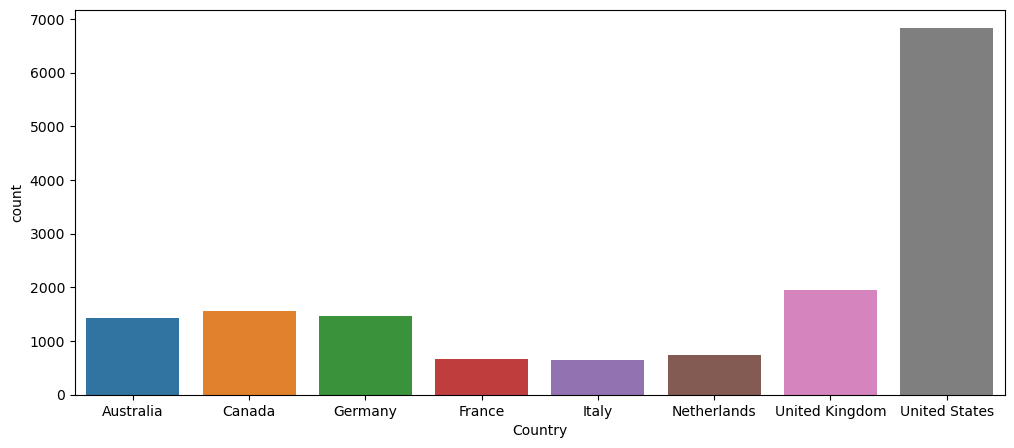

In [28]:
# visualize country counts
plt.figure(figsize=(12,5))
sns.countplot(x=df_customers["Country"],data=df_customers,hue="Country")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")

In [34]:
import pandas as pd

# Example: Save a DataFrame to a CSV
df_customers.to_csv('new_customers.csv', index=False)


In [35]:
from IPython.display import FileLink

# Create a clickable download link
FileLink('new_customers.csv')


C:\Users\sgaut\new_customers.csv

In [32]:
#Exchage Rate
df_exchange=pd.read_csv(r"C:\Users\sgaut\OneDrive\Desktop\DataSpark datasets uncleaned\Exchange_Rates.csv")
df_exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [33]:
df_exchange.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [35]:
df_exchange.dtypes

Date         object
Currency     object
Exchange    float64
dtype: object

In [36]:
df_exchange.describe()

,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [37]:
df_exchange['Date']=pd.to_datetime(df_exchange['Date'])

TypeError: 'str' object is not callable

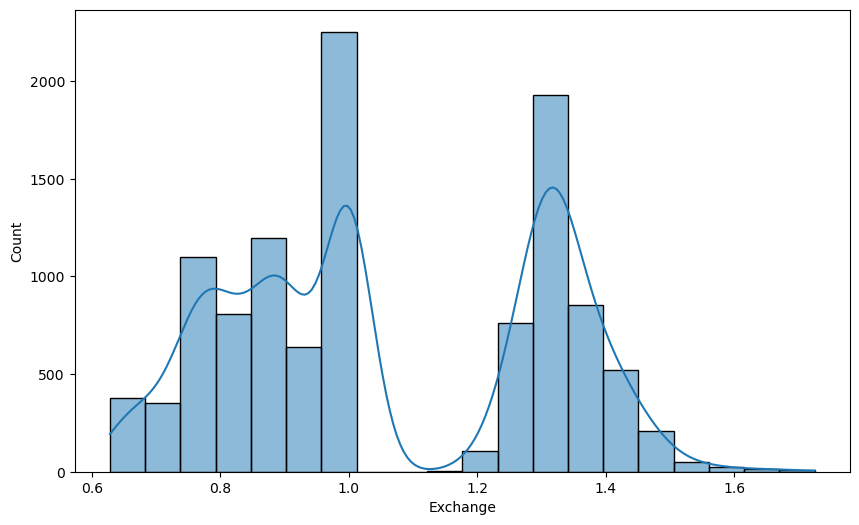

In [39]:
# Visualize the distribution of 'Exchange' rates
plt.figure(figsize=(10, 6))
sns.histplot(df_exchange['Exchange'], bins=20, kde=True)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

TypeError: 'str' object is not callable

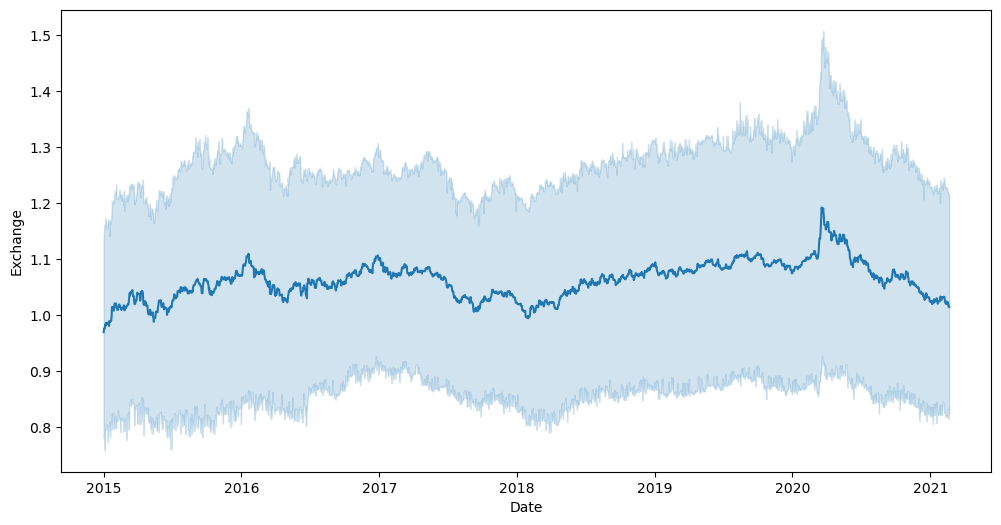

In [40]:
# Analyze the 'Exchange' rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Exchange', data=df_exchange)
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [43]:
#product
df_products=pd.read_csv(r"C:\Users\sgaut\OneDrive\Desktop\DataSpark datasets uncleaned\Products.csv")
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [45]:
df_products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [47]:
df_product.info()
df_product.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [57]:
# Ensure all values are strings, clean them, and convert to float
df_products['Unit Cost USD'] = (
    df_products['Unit Cost USD']
    .astype(str)  # Ensure all values are strings
    .str.replace('$', '', regex=False)  # Remove dollar signs
    .str.replace(',', '', regex=False)  # Remove commas
    .str.strip()  # Remove extra spaces
)
df_products['Unit Cost USD'] = pd.to_numeric(df_products['Unit Cost USD'], errors='coerce')


In [60]:
df_products.drop(["SubcategoryKey"],axis=1,inplace=True)

In [63]:
df_products.drop_duplicates(inplace=True)

TypeError: 'str' object is not callable

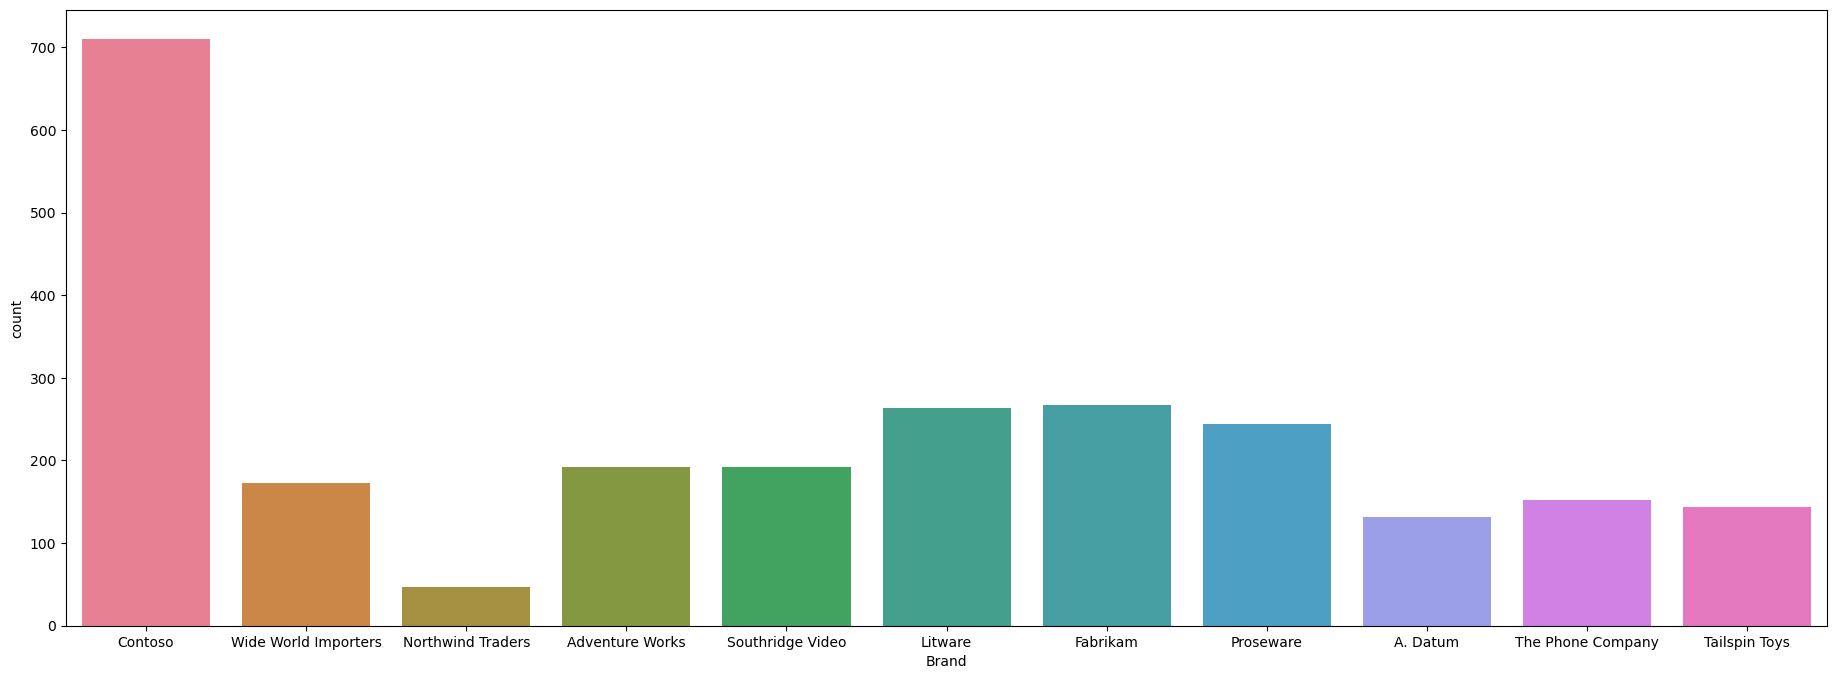

In [65]:
#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"],data=df_products,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")
plt.show()


TypeError: 'str' object is not callable

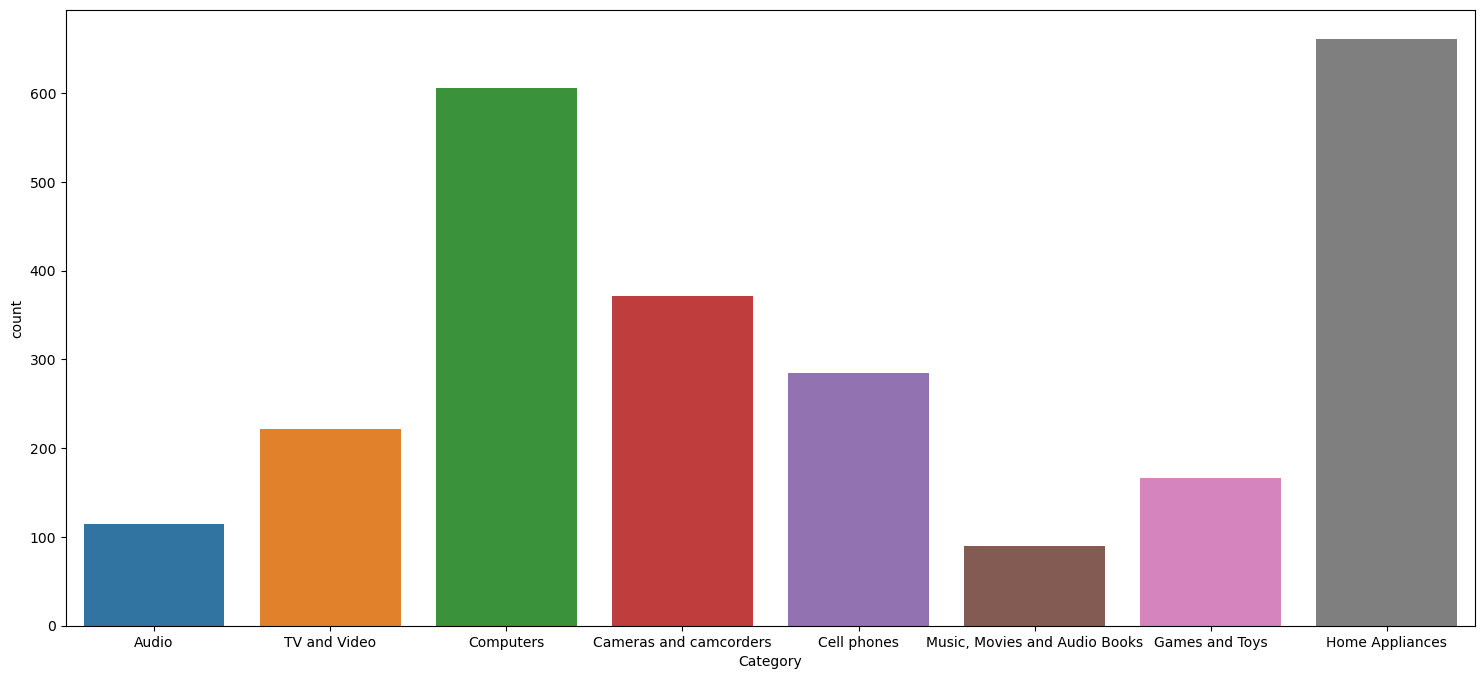

In [66]:
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
sns.countplot(x=df_products["Category"],data=df_products,hue="Category")
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

In [67]:
#sales
df_sales=pd.read_csv(r"C:\Users\sgaut\OneDrive\Desktop\DataSpark datasets uncleaned\Sales.csv")
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [68]:
df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [71]:
df_sales.info()
df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [73]:
df_sales['Order Date']=pd.to_datetime(df_sales['Order Date'])

In [74]:
df_sales['Delivery Date']=pd.to_datetime(df_sales['Delivery Date'])

In [76]:
df_sales['Delivery Date']=df_sales['Delivery Date'].fillna(0)

TypeError: 'str' object is not callable

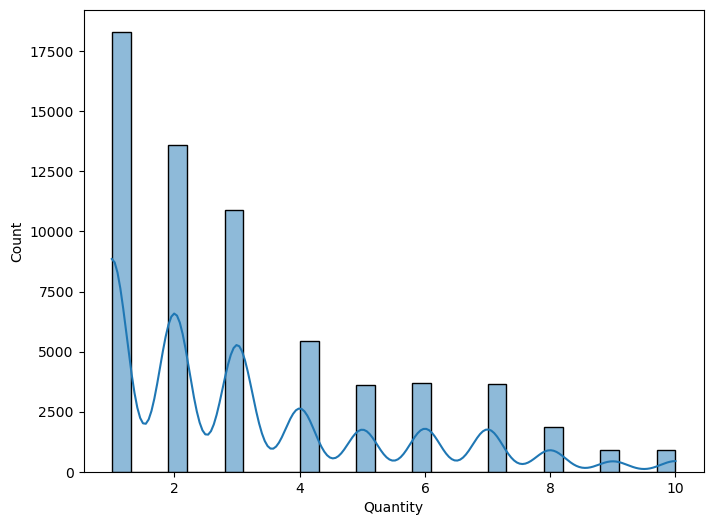

In [79]:
# Explore distributions of numerical features
numerical_features = ['Quantity']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_sales[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

TypeError: 'str' object is not callable

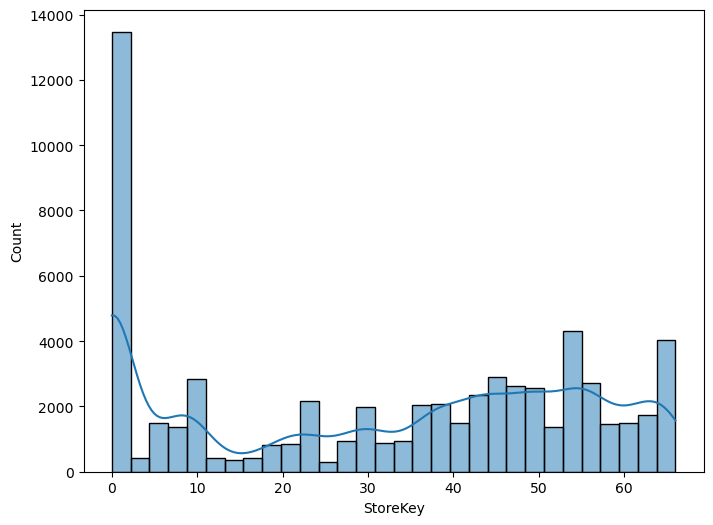

In [80]:
# Explore distributions of numerical features
numerical_features = [ 'StoreKey']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_sales[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

TypeError: 'str' object is not callable

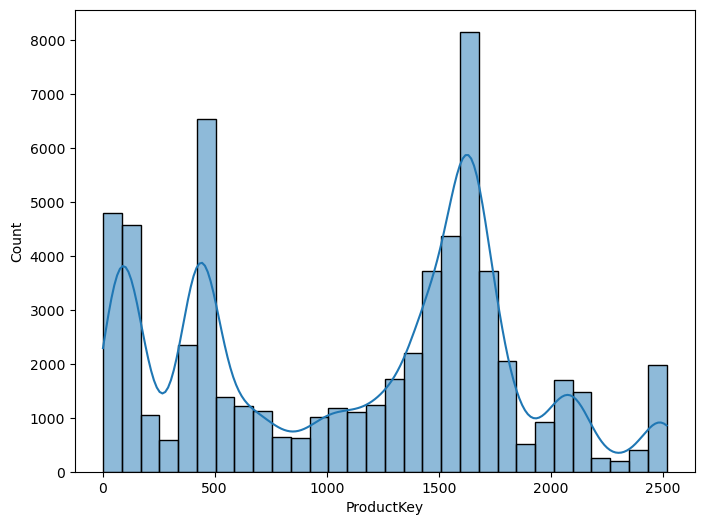

In [81]:
# Explore distributions of numerical features
numerical_features = ['ProductKey']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_sales[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

TypeError: 'str' object is not callable

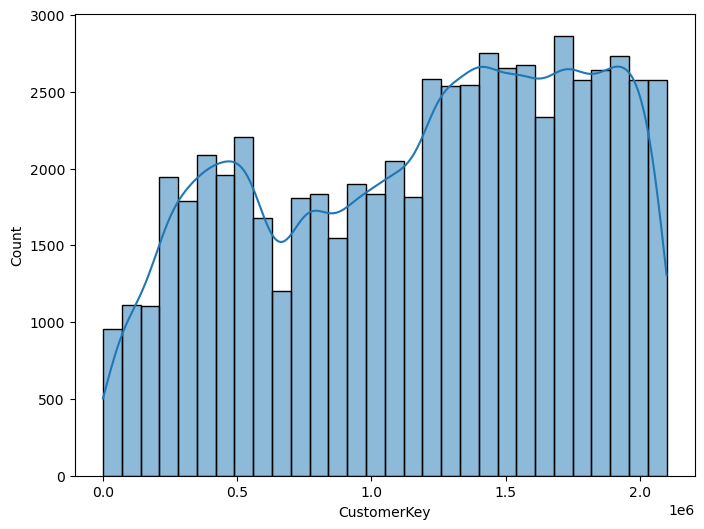

In [82]:
# Explore distributions of numerical features
numerical_features = ['CustomerKey']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_sales[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [83]:
#stores
df_stores=pd.read_csv(r"C:\Users\sgaut\OneDrive\Desktop\DataSpark datasets uncleaned\Stores.csv")
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [87]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [88]:
df_stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [92]:
df_stores['Square Meters']=df_stores['Square Meters'].ffill()

In [94]:
df_stores.drop_duplicates(inplace=True)

In [95]:
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'])

In [110]:
df.to_csv("df_sales.csv", index=False)
df.to_csv("df_customers.csv", index=False)
df.to_csv("df_products.csv", index=False)
df.to_csv("df_exchange.csv", index=False)
df.to_csv("df_stores.csv", index=False)

In [117]:
from IPython.display import FileLink

# Display a download link
FileLink("df_sales.csv")

C:\Users\sgaut\df_sales.csv